# Hassan Augusto Bittencourt de Oliveira
### 22/11/2023

In [98]:
import pandas as pd
import glob

In [99]:
folder_path = "C:/Users/hassa/OneDrive/Área de Trabalho/Emilien/datas/"

# Standard for matching 2020 CSV files in month 10
file_pattern = folder_path + "2020-10-*.csv.gz"

dataframes = []

for file in glob.glob(file_pattern):
    df_temp = pd.read_csv(file, dtype={"id": str, "quoted_id": str, "retweeted_user_id": str}, low_memory=False)
    dataframes.append(df_temp)

df = pd.concat(dataframes, ignore_index=True)

print(df)

                          id          time           created_at  \
0        1311455791027716098  1.601510e+09  2020-10-01T00:00:00   
1        1311455795356213248  1.601510e+09  2020-10-01T00:00:01   
2        1311455793766522881  1.601510e+09  2020-10-01T00:00:01   
3        1311455791757561857  1.601510e+09  2020-10-01T00:00:01   
4        1311455792696942593  1.601510e+09  2020-10-01T00:00:01   
...                      ...           ...                  ...   
1447302  1319050440684806151  1.603321e+09  2020-10-21T22:58:26   
1447303  1319050439736856577  1.603321e+09  2020-10-21T22:58:26   
1447304  1319050445705433096  1.603321e+09  2020-10-21T22:58:27   
1447305  1319050449027256320  1.603321e+09  2020-10-21T22:58:28   
1447306  1319050453032861696  1.603321e+09  2020-10-21T22:58:29   

         from_user_name                                               text  \
0            aweeshucks  RT @TomFitton: #Hydroxychloroquine is a safe d...   
1             DJT202016  RT @TomFitton:

In [100]:
df.columns

Index(['id', 'time', 'created_at', 'from_user_name', 'text', 'filter_level',
       'possibly_sensitive', 'withheld_copyright', 'withheld_scope',
       'withheld_countries', 'truncated', 'retweet_count', 'favorite_count',
       'reply_count', 'lang', 'to_user_name', 'to_user_id',
       'in_reply_to_status_id', 'source', 'source_name', 'source_url',
       'location', 'lat', 'lng', 'from_user_id', 'from_user_realname',
       'from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_withheld_countries',
       'from_user_created_at', 'collected_via_search', 'collected_via_stream',
       'collected_via_thread_only', 'collected_at_timestamp', 'retweeted_id',
       'retweeted_user_name', 'r

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

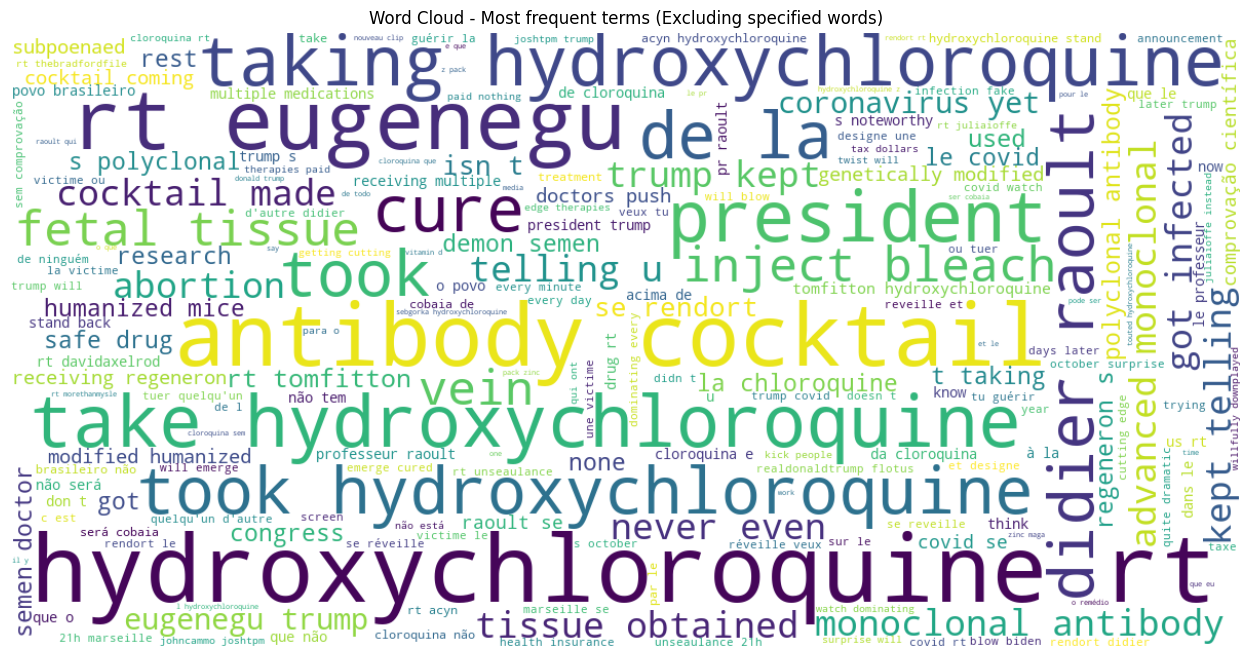

In [102]:
# Problématisée
# What is the most discussed topic on Twitter?

exclude_words = ["https", "link", "twitter", "photo", "youtu", "status", "video"]

def preprocess_text(text):
    words = text.split()
    terms = [word.lower() for word in words if all(exclude_word not in word.lower() for exclude_word in exclude_words)]
    return ' '.join(terms)

df['cleaned_text'] = df['text'].dropna().apply(preprocess_text)

cleaned_terms = ' '.join(df['cleaned_text'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(cleaned_terms)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most frequent terms (Excluding specified words)')
plt.show()

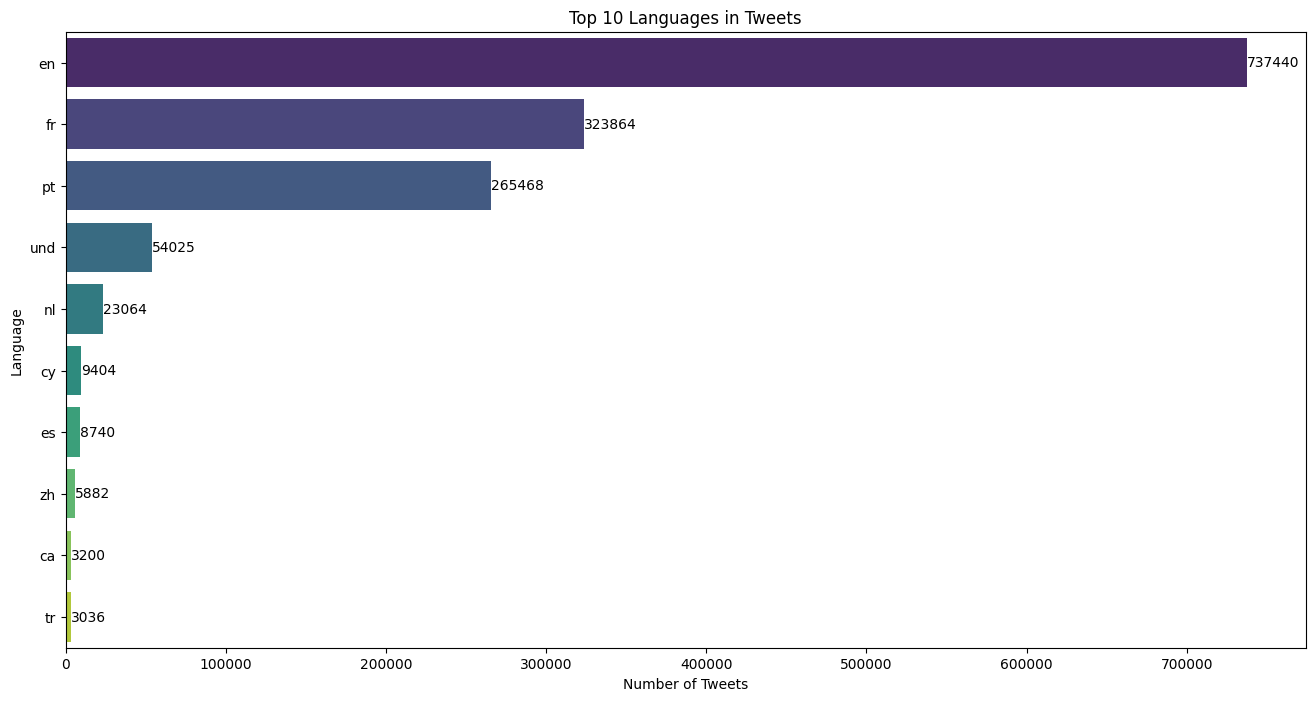

In [103]:
# Finalisée
# Distribution of tweets by language

top_languages = df['lang'].value_counts().head(10)

# Create a color palette for the bar chart
colors = sns.color_palette('viridis', len(top_languages))

plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x=top_languages.values, y=top_languages.index, hue=top_languages.index, palette=colors, dodge=False, legend=False)

# Display exact numbers on the bars
for index, value in enumerate(top_languages.values):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Languages in Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')
plt.show()

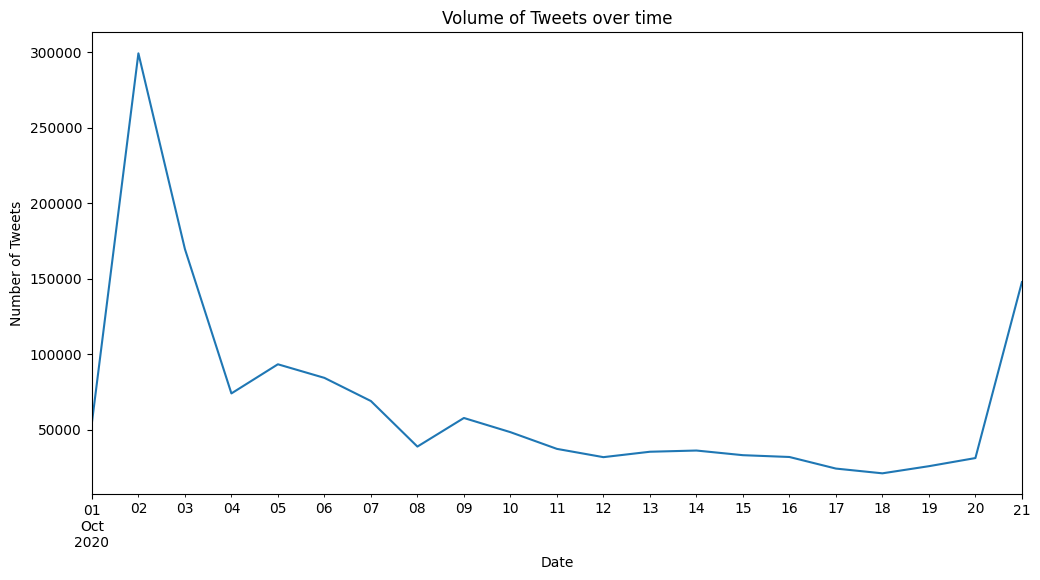

In [104]:
# Complexifiée
# Time Series and Mentions Network

# Convert 'created_at' to datetime type
df['created_at'] = pd.to_datetime(df['created_at'])

# Time series curve of tweet volume
plt.figure(figsize=(12, 6))
df.resample('D', on='created_at').size().plot()
plt.title('Volume of Tweets over time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

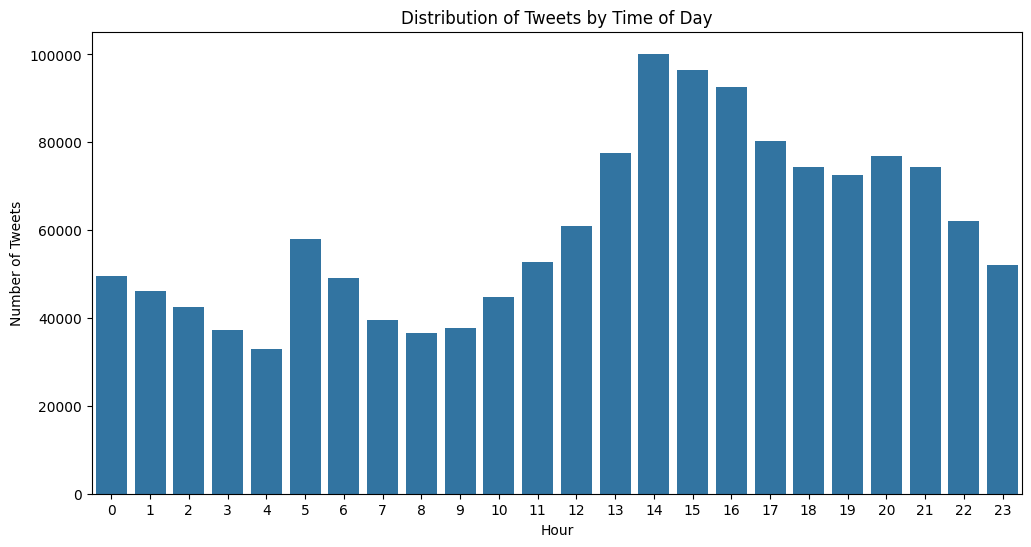

In [105]:
# More active time of day
df['created_at'] = pd.to_datetime(df['created_at'])

# Create an 'hour' column to store the time
df['hour'] = df['created_at'].dt.hour

# Plot the distribution of tweets by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Tweets by Time of Day')
plt.ylabel('Number of Tweets')
plt.xlabel('Hour')
plt.show()

In [106]:
# Engagement Analysis

top_tweets = df.nlargest(3, 'retweet_count')[['text', 'retweet_count', 'favorite_count']]

# Display the top tweets with the entire text
print('Top Tweets:')
for index, row in top_tweets.iterrows():
    print(f"Text: {row['text']}")
    print(f"Retweet Count: {row['retweet_count']}")
    print(f"Favorite Count: {row['favorite_count']}")
    print('-' * 50)



Top Tweets:
Text: Pitch in $5 to help this campaign fly. https://joe.link/3nvsFwL https://twitter.com/JoeBiden/status/1314031047013732352/photo/1
Retweet Count: 170576
Favorite Count: 580502
--------------------------------------------------
Text: To help Donald Trump get the full COVID-19 experience, let’s make sure he loses his job and is evicted from his home next month.
Retweet Count: 140706
Favorite Count: 693526
--------------------------------------------------
Text: ✨🌌 “Shine, Dream, Smile” 🌌✨  .@BTS_twt shines in this performance of “Mikrokosmos” ✨  ▶️ https://youtu.be/oYpUZjxJOVg   #BTSWEEK #BTSonFallon_D4 https://twitter.com/FallonTonight/status/1311887607492640768/video/1
Retweet Count: 118295
Favorite Count: 387474
--------------------------------------------------


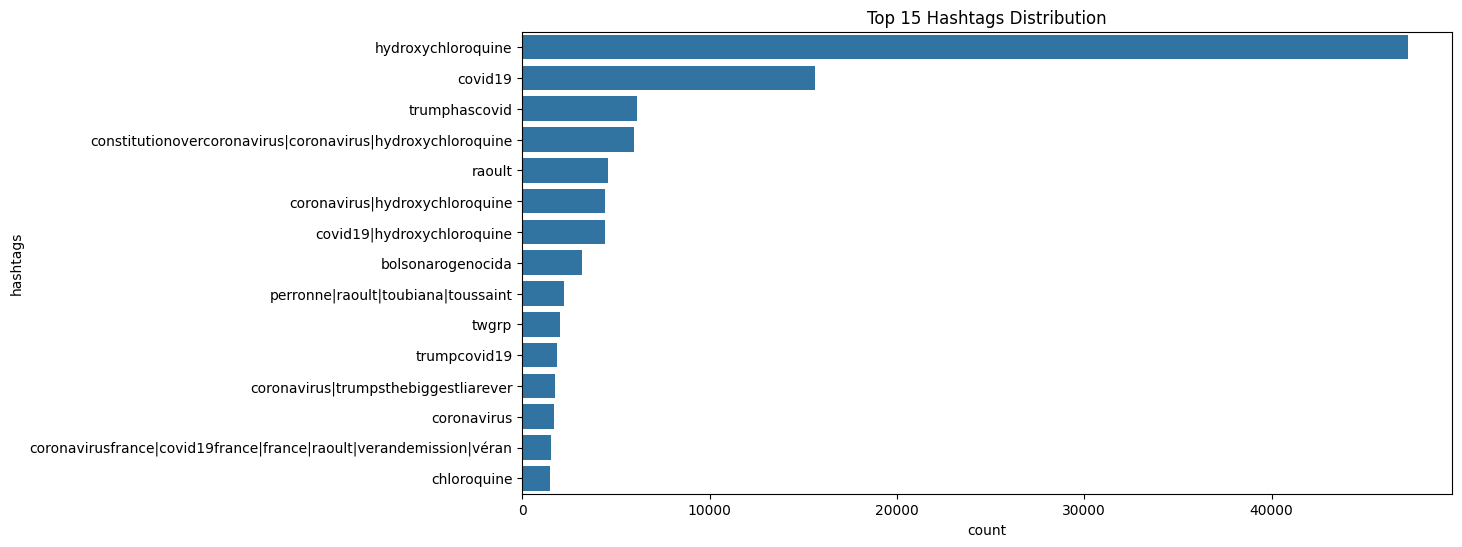

In [107]:
# Content Analysis
# Hashtags
hashtags = df['hashtags'].str.split(',').explode().str.strip()

# Select the top N hashtags
top_n = 15
top_hashtags = hashtags.value_counts().head(top_n).index

# Filter only the top hashtags
filtered_hashtags = hashtags[hashtags.isin(top_hashtags)]

plt.figure(figsize=(12, 6))
sns.countplot(y=filtered_hashtags, order=filtered_hashtags.value_counts().index)
plt.title(f'Top {top_n} Hashtags Distribution')
plt.show()

In [108]:
# Filter tweets with a specific hashtag
filtered_tweets = df[df['hashtags'].str.contains('hydroxychloroquine', case=False, na=False)]

# Find the tweet with the most retweets
top_retweet = filtered_tweets.nlargest(1, 'retweet_count')

top_user = top_retweet['from_user_name'].values[0]

# Print tweet content
print(f'User with the most retweets for #hydroxychloroquine: {top_user}')
print('Top Tweet with Hashtag #hydroxychloroquine:')
print('Text:', top_retweet['text'].values[0])
print('Retweet Count:', top_retweet['retweet_count'].values[0])


User with the most retweets for #hydroxychloroquine: PeachMint17
Top Tweet with Hashtag #hydroxychloroquine:
Text: RT @replouiegohmert: I am taking #Hydroxychloroquine to treat my coronavirus diagnosis. It is what was decided as the best course of action between my doctor and me--not by government bureaucrats. How long until the tech tyrants censor this tweet? https://twitter.com/bennyjohnson/status/1288674325323829249
Retweet Count: 32835


In [109]:
# Filter tweets from user @replouiegohmert
filtered_tweets_ciro = df[df['from_user_name'] == 'replouiegohmert']

# Find the tweet with the most retweets
top_retweet_ciro = filtered_tweets_ciro.nlargest(1, 'retweet_count')

# Print tweet content
print('Top Tweet from @replouiegohmert:')
print('Text:', top_retweet_ciro['text'].values[0])
print('Retweet Count:', top_retweet_ciro['retweet_count'].values[0])
print('Favorite Count:', top_retweet_ciro['favorite_count'].values[0])

Top Tweet from @replouiegohmert:
Text: .@realDonaldTrump was the clear winner in last night’s debate against @JoeBiden’s Press Secretary @SavannahGuthrie #MAGA
Retweet Count: 5089
Favorite Count: 15126


In [110]:
# Retweets and Quotes Analysis
# Retweets and Quotes
retweets = df[df['retweeted_id'].notnull()]
citations = df[df['quoted_id'].notnull()]
print(f'Number of Retweets: {len(retweets)}')
print(f'Number of Citations: {len(citations)}')

Number of Retweets: 925534
Number of Citations: 241417
